In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [5]:
#https://arxiv.org/pdf/1101.3281.pdf

In [6]:
def generate_binary_list(N, fixed_length=None):
    a_test = range(2**N)
    binary_list = []
    # Determine the fixed length if not provided
    if fixed_length is None:
        fixed_length = len(bin(max(a_test))) - 2
    for num in a_test:
        binary_representation = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_digits = [int(digit) for digit in binary_representation]
        while len(binary_digits) < fixed_length:
            binary_digits.insert(0, 0)
        binary_digits.reverse()
        binary_list.append(binary_digits)

    return a_test, binary_list

a_test, a_bin = generate_binary_list(3)

print("a_test:", list(a_test))
print("a_bin:", a_bin)

a_test: [0, 1, 2, 3, 4, 5, 6, 7]
a_bin: [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


In [7]:
def flip(a, i, j):
    f = 2**i + 2**j
    return a^f

def generate_Hamiltonian(N):
    a, a_binary = generate_binary_list(N)
    a = list(a)
    H = np.zeros((2**N, 2**N))
    for a_bin, a_int in zip(a_binary, a):
        for i in range(N):
            j = (i+1)%N
            if a_bin[i] == a_bin[j]:
                H[a_int,a_int] += 1/4
            else:
                H[a_int,a_int] -= 1/4
                b = flip(a_int, i, j)
                H[a_int, b] = 1/2
    return H

H_2 = generate_Hamiltonian(2)
#Todo: Why for N=7 imaginary?Numerical error

print(H_2)

[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.   0.   0.   0.5]]


In [8]:
eigs_2 = np.linalg.eig(H_2)
eigs_2.eigenvalues

array([ 1.11022302e-16, -1.00000000e+00,  5.00000000e-01,  5.00000000e-01])

In [9]:
np.transpose(eigs_2.eigenvectors) #Todo: Need to transpose?

array([[ 0.        ,  0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [10]:
eigenvalues = []
eigenvectors = []
list_N = np.arange(2,7)

for n in list_N:
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    eigvals = eigs.eigenvalues
    eigvecs = np.transpose(eigs.eigenvectors)
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

[np.min(e) for e in eigenvalues]

[-0.9999999999999999,
 -0.75,
 -1.9999999999999987,
 -1.8680339887499,
 (-2.8027756377319992+0j)]

In [11]:
for n in list_N:
    print(f"n = {n}:")
    print(eigenvectors[n-2][np.argmin(eigenvalues[n-2])])

n = 2:
[ 0.          0.70710678 -0.70710678  0.        ]
n = 3:
[ 0.          0.          0.          0.40824829  0.          0.40824829
 -0.81649658  0.        ]
n = 4:
[ 0.00000000e+00  2.77354685e-17  2.57913478e-17  2.88675135e-01
 -8.55761944e-17 -5.77350269e-01  2.88675135e-01  5.93181067e-17
  4.45654388e-17  2.88675135e-01 -5.77350269e-01  4.86828725e-33
  2.88675135e-01 -5.93181067e-17  4.86828725e-33  0.00000000e+00]
n = 5:
[ 0.00000000e+00  1.00607891e-16 -9.37588118e-17 -2.25301316e-01
  8.22872906e-17  4.57243147e-01 -5.72904897e-02  2.87191878e-12
  3.68069548e-17 -1.49988449e-01 -2.14556738e-01 -6.48222379e-12
  1.89893846e-01  2.96975423e-12  6.40566639e-13 -2.77218716e-17
  3.05548646e-17 -8.19533814e-02  4.97148544e-01  1.13468151e-12
 -5.89846503e-01  1.67624977e-12 -5.68277868e-12 -3.47167794e-18
  1.74651341e-01 -2.17032895e-12  7.51783158e-12 -2.82752094e-18
 -2.47571470e-12  2.18275281e-17  4.43718334e-33  0.00000000e+00]
n = 6:
[ 0.00000000e+00+0.j  1.11022302e-

In [12]:
eigenvectors[0][1]

array([ 0.        ,  0.70710678, -0.70710678,  0.        ])

# Part b

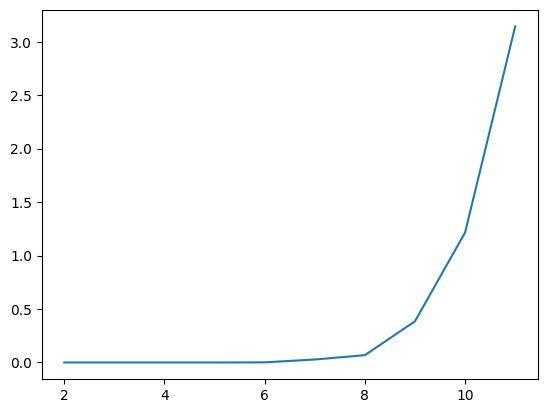

In [13]:
computing_times_b = []
list_N = np.arange(2,12)

for n in list_N:
    start = time.time()
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times_b.append(diff_time)

plt.plot(list_N, computing_times_b)

In [14]:
computing_times_b

[0.0,
 0.0,
 0.0,
 0.0,
 0.0010004043579101562,
 0.02775716781616211,
 0.06840109825134277,
 0.3855574131011963,
 1.2155251502990723,
 3.1429758071899414]

Part c)

In [15]:
k_B = 1#.38 *10**(-23)

def magnetisation_for_state(state, N):
    list_a_int, list_a_bin = generate_binary_list(N)
    list_m = [] #Magnetisation per particle for all basis states
    for spin_sequence in list_a_bin: #Iterate over all basis states (their binary representation) to determine their magnetisation
        m = 0
        for s in spin_sequence:
            if s == 1:
                m += 1/2
            elif s == -1:
                m -= 1/2
            elif s == 0:
                m -= 1/2
            else:
                print("Spin sequence is neither binary nor sequence of 1 and -1")
        list_m.append(m)
    mz = 0
    for index, val in enumerate(state):
        mz += list_m[index] * val**2 #Todo: quadrat oder nicht?
    return mz

def specific_heat(energies, N, T):
    prefs = [np.exp(-e/T) for e in energies]
    mean_energy = np.average(energies, weights=prefs)
    mean_square_energy = np.average([e_i**2 for e_i in energies], weights=prefs)
    return (mean_square_energy - mean_energy**2)/(N*k_B*T**2)

def magnetic_susceptibility(arr_states, energies, N, T):
    prefs = [np.exp(-e/T) for e in energies]
    m_states = []
    for state in arr_states:
        m_s = magnetisation_for_state(state, N)
        m_states.append(m_s)
    m_mean = np.average(m_states, weights=prefs)
    m_2_mean = np.average([m**2 for m in m_states], weights=prefs)
    return (1/(N*T))*(m_2_mean-m_mean**2)

def C_v(N, T, J=1):
    frac = J/(k_B*T)
    enum = frac**2
    denom = np.cosh(frac)**2
    return N*k_B*enum/denom

In [16]:
state_test = [0,1/np.sqrt(2),-1/np.sqrt(2),0]
n_test = 2

print(magnetisation_for_state(state_test,n_test))
print(magnetic_susceptibility([state_test], [-1], n_test, 1))

0.0
0.0


In [ ]:
list_N_c = [2,4,6,8,10]#,12] #Todo: Add another
specific_heats = []
magnetic_susceptibilities = []
list_T = np.linspace(0.1,2,100)

for n in list_N_c:
    list_sp = []
    list_ms = []
    for temp in list_T:
        H_n = generate_Hamiltonian(n)
        eigs = np.linalg.eig(H_n)
        eigvecs = eigs.eigenvectors
        sp = specific_heat(eigs.eigenvalues, n, temp)
        list_sp.append(sp)
        ms = magnetic_susceptibility(eigvecs, np.real(eigs.eigenvalues), n, temp)
        list_ms.append(ms)
    magnetic_susceptibilities.append(list_ms)
    specific_heats.append(list_sp)

In [ ]:
plt.plot(list_T, specific_heats[0], label="N = 2")
plt.plot(list_T, specific_heats[1], label="N = 4")
plt.plot(list_T, specific_heats[2], label="N = 6") #Todo: Calculate and plot this as well
plt.plot(list_T, specific_heats[3], label="N = 8") #Todo: Calculate and plot this as well
plt.plot(list_T, specific_heats[4], label="N = 10") #Todo: Calculate and plot this as well
plt.plot(list_T, [3/(13*t**2) for t in list_T], "k--")
plt.title("2c): specific heat")
plt.xlabel("T")
plt.ylim(0,0.5)
plt.legend()

In [ ]:
magnetisation_for_state([0,0,0,1,1,1,0,0],3)

In [ ]:
plt.plot(list_T, magnetic_susceptibilities[0], label="N = 2")
plt.plot(list_T, magnetic_susceptibilities[1], label="N = 4")
plt.plot(list_T, magnetic_susceptibilities[2], label="N = 6")
plt.plot(list_T, magnetic_susceptibilities[3], label="N = 8")
plt.plot(list_T, magnetic_susceptibilities[4], label="N = 10")
plt.plot(list_T, [1/(4*t) for t in list_T], "k--", label="")
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
#plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): Magnetic susceptibility")
plt.xlabel("T")
plt.ylim(0,0.25)
plt.legend()

In [ ]:
plt.plot(list_T, np.array(magnetic_susceptibilities[0])/np.array([1/(4*t) for t in list_T]), label="N = 2")
plt.plot(list_T, np.array(magnetic_susceptibilities[1])/np.array([1/(4*t) for t in list_T]), label="N = 4")
plt.plot(list_T, np.array(magnetic_susceptibilities[2])/np.array([1/(4*t) for t in list_T]), label="N = 6")
plt.plot(list_T, np.array(magnetic_susceptibilities[3])/np.array([1/(4*t) for t in list_T]), label="N = 8")
plt.plot(list_T, np.array(magnetic_susceptibilities[4])/np.array([1/(4*t) for t in list_T]), label="N = 10")
plt.plot(list_T, np.ones(list_T.shape[0]))  
#plt.plot(list_T, specific_heats[2], label="N = 12") #Todo: Calculate and plot this as well
#plt.plot(list_T, [3/(13*t**2) for t in list_T])
plt.title("2c): Magnetic susceptibility")
plt.xlabel("T")
plt.ylim(0.9,1.1)
plt.legend()

In [ ]:
def correlation_spins(spin_sequence, i=0, j=2):
    return spin_sequence[i]*spin_sequence[j]

# Problem 3

In [ ]:
N=3

H = generate_Hamiltonian(N)
print(H)

#M = math.factorial(N)/(math.factorial(n_up)*math.factorial(N-n_up))

def get_basis_set(m_z, N):
    n_up = m_z + N/2 
    basis_set = []
    a = 0
    for s, s_bin in zip(*generate_binary_list(N)):
        if np.sum(s_bin) == n_up:
            a += 1
            s_a = s
            basis_set.append(s_a)
    M = a
    return basis_set, M
    
s_a, a = get_basis_set(1/2, 3)

In [ ]:
print(get_basis_set(-3/2, 3), get_basis_set(-1/2, 3), get_basis_set(1/2, 3), get_basis_set(3/2, 3))

In [ ]:
def findstate(s_, M):
    #s_b = list(bin(b)[2:])
    #s_b.reverse()
    bmin = 0; bmax = -1
    for i in range(1000):
        b = bmin + (bmax-bmin)/2
        if s_ < b:
            bmax = b-1
        elif s_ > b:
            bmin = b+1
        else:
            return b
    raise RuntimeError("No b found")

def generate_Hamiltonian_for_mz(N, mz):
    list_s, M = get_basis_set(mz, N)
    H = np.zeros((M, M))
    for a in range(M):
        s = list_s[a]
        s_bin = list(bin(s)[2:].zfill(N))
        s_bin.reverse()
        for i in range(N):
            #s_a = bool(a & (1 << i))
            j = (i+1)%N 
            if s_bin[i] == s_bin[j]:
                H[a,a] += 1/4
            else:
                H[a,a] -= 1/4
                s_asterisk = flip(list_s[a], i, j)
                b = list_s.index(s_asterisk)
                H[a, b] = 1/2
    return H

h = generate_Hamiltonian_for_mz(3, -3/2)
print(h)

In [ ]:
eigenvalues = []
for n in range(2,7):
    eigs_n = []
    for m_z in np.arange(-n/2, n/2+1, 1, dtype=float):
        H_mz = generate_Hamiltonian_for_mz(n, m_z)
        eigs = np.linalg.eig(H_mz)
        eigvals = eigs.eigenvalues
        eigs_n.append(eigvals)
    eigs_n = [number for subarray in eigs_n for number in subarray]
    eigenvalues.append(np.min(eigs_n))

print(eigenvalues)

In [ ]:
[-0.9999999999999999,
 -0.75,
 -1.9999999999999987,
 -1.8680339887499,
 (-2.8027756377319992+0j)]

In [ ]:
def block_diagonal(matrices):
    shapes = np.array([matrix.shape for matrix in matrices])
    new_shape = shapes.sum(axis=0)
    result = np.zeros(new_shape, dtype=matrices[0].dtype)

    row, col = 0, 0
    for matrix in matrices:
        rows, cols = matrix.shape
        result[row:row+rows, col:col+cols] = matrix
        row += rows
        col += cols

    return result

In [ ]:
N = 3
list_matrices = []
for m_z in np.arange(-N/2, N/2+1, 1, dtype=float):
    h = generate_Hamiltonian_for_mz(N, m_z)
    h = np.array(h)
    list_matrices.append(h)
H_blocks = block_diagonal(list_matrices)
print(H_blocks)

In [ ]:
computing_times = []
list_N = np.arange(2,12) #todo: compare with problem 2 

for n in list_N:
    start = time.time()
    list_matrices = []
    for m_z in np.arange(-n/2, n/2+1, 1, dtype=float):
        h = generate_Hamiltonian_for_mz(n, m_z)
        h = np.array(h)
        list_matrices.append(h)
    h_blocks = block_diagonal(list_matrices)
    eigs = np.linalg.eig(h_blocks)
    stop = time.time()
    diff_time = stop - start
    computing_times.append(diff_time)

plt.plot(list_N, computing_times, label="Block hamiltonian")
plt.plot(list_N, computing_times_b, label = "Non-block hamiltonian")
plt.legend()
plt.xlabel("N")
plt.ylabel("Computing time")
plt.title("Problem 3: Computing times for diagonalisation")

# Problem 4

In [ ]:
def construct_lanczos_basis(h, Lambda):
    """
    Function to construct a Lanczos basis from a given hamiltonian
    :param h: 
        hamiltonian to construct the lanczos basis
    :return: 
        coeffs_normalized: 2D-array of normalized lanczos basis coefficients,
        list_a: array of parameters a to construct lanczos hamiltonian, 
        list_b: array of parameters b to construct lanczos hamiltonian
    """
    dim = h.shape[0]
    if dim < Lambda:
        print("Dimension of original Hamiltonian is smaller than Krylov")
        exit()
    coeffs = []
    coeffs_normalized = []
    list_a = []
    list_b = []
    list_norm = []
    #randomly determine initial state
    coeffs_0 = np.random.uniform(size=dim)
    n_0 = np.dot(coeffs_0, coeffs_0)
    coeffs.append(coeffs_0)
    coeffs_normalized.append(coeffs_0/np.sqrt(n_0))
    list_norm.append(n_0)
    #construct second state
    h_00 = np.dot(coeffs[0], np.matmul(h, coeffs[0]))
    a_0 = h_00/n_0
    list_a.append(a_0)
    coeffs_1 = np.matmul(h, coeffs[0]) - a_0*coeffs[0]
    n_1 = np.dot(coeffs_1, coeffs_1)
    coeffs.append(coeffs_1)
    coeffs_normalized.append(coeffs_1/np.sqrt(n_1))
    list_norm.append(n_1)
    #construct remaining states
    for m in range(1, Lambda):
        h_mm = np.dot(coeffs[m], np.matmul(h, coeffs[m]))
        n_m = list_norm[m]
        n_m1 = list_norm[m-1]
        a_m = h_mm/n_m
        b_m1 = n_m/n_m1
        coeffs_mp = np.matmul(h, coeffs[m]) - a_m*coeffs[m] - b_m1*coeffs[m-1]
        n_mp = np.dot(coeffs_mp, coeffs_mp)
        coeffs.append(coeffs_mp)
        coeffs_normalized.append(coeffs_mp/np.sqrt(n_mp))
        list_a.append(a_m)
        list_b.append(b_m1)
        list_norm.append(n_mp)
    n_last = np.dot(coeffs[-1], coeffs[-1])
    n_before = np.dot(coeffs[-2], coeffs[-2])
    b_last = n_last/n_before
    list_b.append(b_last)
    return coeffs, list_a, list_b, list_norm

def construct_lanczos_hamiltonian(list_a, list_b):
    dim = len(list_a)
    h_lanczos = np.zeros((dim, dim))
    # add first- and last-row elements manually
    h_lanczos[0,0] = list_a[0]
    h_lanczos[1,0] = np.sqrt(list_b[0])
    h_lanczos[-1,-1]= list_a[-1]
    h_lanczos[-2, -1] = np.sqrt(list_b[-2])
    # fill middle of lanczos hamiltonian
    for m in range(1, dim-1):
        h_lanczos[m,m] = list_a[m]
        h_lanczos[m-1, m] = np.sqrt(list_b[m-1])
        h_lanczos[m+1, m] = np.sqrt(list_b[m])
    return h_lanczos

In [ ]:
computing_times_4 = []
list_N = np.arange(2,12) #todo: plot for n=11 and compare with problem 2 and 3

for n in list_N:
    print(n)
    start = time.time()
    for m_z in np.arange(-n/2, n/2+1, 1, dtype=float):
        h = generate_Hamiltonian_for_mz(n, m_z)
        h = np.array(h)
        vecs, la, lb, norms = construct_lanczos_basis(h, n) #I did the full lanczos basis instead of applying the stopping criterion
        H_n = construct_lanczos_hamiltonian(la, lb)
        H_n = np.array(H_n)
        eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times_4.append(diff_time)

plt.plot(list_N, computing_times_4, label="Lanczos method")
plt.plot(list_N, computing_times, label="Block hamiltonian")
plt.plot(list_N, computing_times_b, label = "Non-block hamiltonian")
plt.legend()
plt.xlabel("N")
plt.ylabel("Computing time")
plt.title("Problem 4: Computing times for diagonalisation")

4b)

In [ ]:
minimal_eigenvalues = []

for l in range(2, 50):
    h = generate_Hamiltonian_for_mz(10, 0)
    coeffs, la, lb, ln = construct_lanczos_basis(h, l)
    h_lanczos = construct_lanczos_hamiltonian(la,lb)
    eig = np.linalg.eig(h_lanczos)
    eig_min = np.min(eig.eigenvalues)
    minimal_eigenvalues.append(eig_min)
    
plt.plot(np.arange(48), minimal_eigenvalues)
plt.title("Problem 4b): Minimal eigenvalue of Lanczos hamiltonian in dependence of Lambda")
plt.xlabel("Lambda")
plt.ylabel("$E_{0}$")

The implementation of the lanczos basis function does not work apparently, because many lanczos basis states are not orthogonal:

In [ ]:
h = generate_Hamiltonian(3)
vecs, la, lb, norms = construct_lanczos_basis(h, 8)
for i, a in enumerate(vecs):
    for j, b in enumerate(vecs):
        if i!=j:
            dot = np.dot(a/np.linalg.norm(a),b/np.linalg.norm(b))
            print(i, j, dot)